In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('z_train.csv')

In [3]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,21651,city_176,0.764,NaN,Has relevent experience,Part time course,Graduate,STEM,11,NaN,NaN,1,24,1.0


In [4]:
df.target.isnull().sum()

0

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15326 entries, 0 to 15325
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             15326 non-null  int64  
 1   city                    15326 non-null  object 
 2   city_development_index  15326 non-null  float64
 3   gender                  11725 non-null  object 
 4   relevent_experience     15326 non-null  object 
 5   enrolled_university     15024 non-null  object 
 6   education_level         14957 non-null  object 
 7   major_discipline        13089 non-null  object 
 8   experience              15276 non-null  object 
 9   company_size            10592 non-null  object 
 10  company_type            10435 non-null  object 
 11  last_new_job            14987 non-null  object 
 12  training_hours          15326 non-null  int64  
 13  target                  15326 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [6]:
df.drop(columns= 'enrollee_id', inplace=True)

In [7]:
#Nulos
columnas_nulas =df.isnull().sum()[(df.isnull().sum().sort_values(ascending=False)/df.shape[0])*100 > 0].index
columnas_nulas

Index(['gender', 'enrolled_university', 'education_level', 'major_discipline',
       'experience', 'company_size', 'company_type', 'last_new_job'],
      dtype='object')

In [8]:
df.company_type.value_counts()

Pvt Ltd                7873
Funded Startup          792
Public Sector           773
Early Stage Startup     489
NGO                     421
Other                    87
Name: company_type, dtype: int64

In [9]:
df.company_size.value_counts()

50-99        2448
100-500      2059
10000+       1653
10/49        1173
1000-4999    1066
<10          1043
500-999       707
5000-9999     443
Name: company_size, dtype: int64

In [10]:
df[columnas_nulas].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15326 entries, 0 to 15325
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   gender               11725 non-null  object
 1   enrolled_university  15024 non-null  object
 2   education_level      14957 non-null  object
 3   major_discipline     13089 non-null  object
 4   experience           15276 non-null  object
 5   company_size         10592 non-null  object
 6   company_type         10435 non-null  object
 7   last_new_job         14987 non-null  object
dtypes: object(8)
memory usage: 958.0+ KB


In [11]:
df[columnas_nulas].head()

,gender,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job
0,Male,no_enrollment,Graduate,STEM,>20,NaN,NaN,1
1,Male,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4
2,NaN,Full time course,Graduate,STEM,5,NaN,NaN,never
3,NaN,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never
4,NaN,Part time course,Graduate,STEM,11,NaN,NaN,1


In [12]:
df.last_new_job.value_counts()

1        6458
>4       2627
2        2318
never    1945
4         823
3         816
Name: last_new_job, dtype: int64

In [13]:
df['last_new_job']=df.last_new_job.str.replace('never', '0').str.replace('>4', '5')

In [14]:
df['last_new_job']=pd.to_numeric(df['last_new_job'])

In [15]:
df[columnas_nulas].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15326 entries, 0 to 15325
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               11725 non-null  object 
 1   enrolled_university  15024 non-null  object 
 2   education_level      14957 non-null  object 
 3   major_discipline     13089 non-null  object 
 4   experience           15276 non-null  object 
 5   company_size         10592 non-null  object 
 6   company_type         10435 non-null  object 
 7   last_new_job         14987 non-null  float64
dtypes: float64(1), object(7)
memory usage: 958.0+ KB


In [16]:
df['experience']=pd.to_numeric(df.experience.str.replace('>20', '21').str.replace('<1','0'))

In [17]:
df[columnas_nulas].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15326 entries, 0 to 15325
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               11725 non-null  object 
 1   enrolled_university  15024 non-null  object 
 2   education_level      14957 non-null  object 
 3   major_discipline     13089 non-null  object 
 4   experience           15276 non-null  float64
 5   company_size         10592 non-null  object 
 6   company_type         10435 non-null  object 
 7   last_new_job         14987 non-null  float64
dtypes: float64(2), object(6)
memory usage: 958.0+ KB


In [18]:
columnas_nulas

Index(['gender', 'enrolled_university', 'education_level', 'major_discipline',
       'experience', 'company_size', 'company_type', 'last_new_job'],
      dtype='object')

# Relleno Nulos

## categoricas

In [19]:
from feature_engine import imputation as mdi

In [20]:
categorico_nulos=mdi.CategoricalImputer('frequent', variables = ['gender','enrolled_university', 'education_level', 'major_discipline', 'company_size', 'company_type'])

In [21]:
df_sin_nulos=categorico_nulos.fit_transform(df)

In [22]:
df_sin_nulos.isnull().sum()

city                        0
city_development_index      0
gender                      0
relevent_experience         0
enrolled_university         0
education_level             0
major_discipline            0
experience                 50
company_size                0
company_type                0
last_new_job              339
training_hours              0
target                      0
dtype: int64

# Numericas

In [23]:
df_sin_nulos.describe()

,city_development_index,experience,last_new_job,training_hours,target
count,15326.000000,15276.000000,14987.000000,15326.000000,15326.000000
mean,0.829929,10.111744,1.999666,65.279068,0.249511
std,0.122668,6.772662,1.673882,60.079482,0.432744
min,0.448000,0.000000,0.000000,1.000000,0.000000
25%,0.743000,4.000000,1.000000,23.000000,0.000000
50%,0.910000,9.000000,1.000000,47.000000,0.000000
75%,0.920000,16.000000,3.000000,89.000000,0.000000
max,0.949000,21.000000,5.000000,336.000000,1.000000


In [24]:
num_nulos=mdi.MeanMedianImputer('median', variables = ['city_development_index', 'experience', 'last_new_job', 'training_hours'])

In [25]:
df_sin_nulos = num_nulos.fit_transform(df_sin_nulos)

In [26]:
df_sin_nulos.isnull().sum()

city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
target                    0
dtype: int64

# Transformación

In [27]:
y = df_sin_nulos.target

In [28]:
df_sin_nulos.drop(columns= 'target', inplace=True)

array([[<AxesSubplot:title={'center':'city_development_index'}>,
        <AxesSubplot:title={'center':'experience'}>],
       [<AxesSubplot:title={'center':'last_new_job'}>,
        <AxesSubplot:title={'center':'training_hours'}>]], dtype=object)

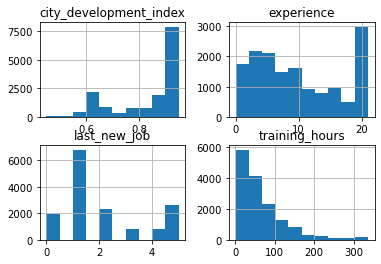

In [29]:
df_sin_nulos.hist()

In [30]:
df_transformado = df_sin_nulos.copy()
df_transformado

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,21.0,50-99,Pvt Ltd,1.0,36
1,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,5.0,47
2,city_21,0.624,Male,No relevent experience,Full time course,Graduate,STEM,5.0,50-99,Pvt Ltd,0.0,83
3,city_115,0.789,Male,No relevent experience,no_enrollment,Graduate,Business Degree,0.0,50-99,Pvt Ltd,0.0,52
4,city_176,0.764,Male,Has relevent experience,Part time course,Graduate,STEM,11.0,50-99,Pvt Ltd,1.0,24
...,...,...,...,...,...,...,...,...,...,...,...,...
15321,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14.0,50-99,Pvt Ltd,1.0,42
15322,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14.0,50-99,Pvt Ltd,4.0,52
15323,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,21.0,50-99,Pvt Ltd,4.0,44
15324,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,STEM,0.0,500-999,Pvt Ltd,2.0,97


## OrdinalEncoder

In [31]:
from sklearn import preprocessing

In [32]:
df_transformado.columns

Index(['city', 'city_development_index', 'gender', 'relevent_experience',
       'enrolled_university', 'education_level', 'major_discipline',
       'experience', 'company_size', 'company_type', 'last_new_job',
       'training_hours'],
      dtype='object')

In [33]:
df_transformado.relevent_experience.unique()

array(['Has relevent experience', 'No relevent experience'], dtype=object)

In [34]:
df_transformado.education_level.unique()

array(['Graduate', 'High School', 'Masters', 'Phd', 'Primary School'],
      dtype=object)

In [35]:
ordinales = ['relevent_experience', 'education_level']

In [36]:
relevent_experience = preprocessing.OrdinalEncoder(categories = [['No relevent experience', 'Has relevent experience']], handle_unknown='use_encoded_value', unknown_value = -1)
df_transformado['relevent_experience']=relevent_experience.fit_transform(df_transformado[['relevent_experience']])

In [37]:
education_level = preprocessing.OrdinalEncoder(categories = [['Primary School','High School', 'Graduate', 'Masters', 'Phd']])
df_transformado['education_level']=education_level.fit_transform(df_transformado[['education_level']])

In [38]:
df_transformado['education_level'].value_counts()

2.0    9634
3.0    3514
1.0    1607
4.0     329
0.0     242
Name: education_level, dtype: int64

## categóricas no ordinales

In [39]:
from feature_engine.encoding import CountFrequencyEncoder

In [40]:
df_transformado.columns

Index(['city', 'city_development_index', 'gender', 'relevent_experience',
       'enrolled_university', 'education_level', 'major_discipline',
       'experience', 'company_size', 'company_type', 'last_new_job',
       'training_hours'],
      dtype='object')

In [41]:
df_transformado[['experience', 'last_new_job']]=df_transformado[['experience', 'last_new_job']].astype(str)

In [42]:
categoricas= CountFrequencyEncoder(encoding_method = 'frequency',variables = ['city', 'gender', 'enrolled_university', 'major_discipline','experience','company_size', 'company_type','last_new_job'] )
df_transformado = categoricas.fit_transform(df_transformado)

In [43]:
df_transformado.head()

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,0.228174,0.920,0.925095,1.0,0.742072,2.0,0.903432,0.171800,0.468615,0.832833,0.443495,36
1,0.003589,0.776,0.925095,0.0,0.742072,2.0,0.903432,0.036082,0.468615,0.832833,0.171408,47
2,0.140676,0.624,0.925095,0.0,0.195093,2.0,0.903432,0.074905,0.468615,0.832833,0.126909,83
3,0.002740,0.789,0.925095,0.0,0.742072,2.0,0.016899,0.026621,0.468615,0.832833,0.126909,52
4,0.001370,0.764,0.925095,1.0,0.062834,2.0,0.903432,0.035104,0.468615,0.832833,0.443495,24


In [44]:
(pd.concat((df_transformado,y), axis=1)).corr().target

city                      0.080629
city_development_index   -0.346320
gender                   -0.004279
relevent_experience      -0.127104
enrolled_university      -0.128498
education_level          -0.015313
major_discipline          0.011777
experience               -0.067750
company_size              0.166250
company_type              0.053523
last_new_job              0.035194
training_hours           -0.018939
target                    1.000000
Name: target, dtype: float64

## Sacler

In [196]:
df_transformado.describe().T

,count,mean,std,min,25%,50%,75%,max
city,15326.0,0.089827,0.087433,0.000065,0.009983,0.069620,0.140676,0.228174
city_development_index,15326.0,0.829929,0.122668,0.448000,0.743000,0.910000,0.920000,0.949000
gender,15326.0,0.860136,0.228347,0.009787,0.925095,0.925095,0.925095,0.925095
relevent_experience,15326.0,0.722171,0.447943,0.000000,0.000000,1.000000,1.000000,1.000000
enrolled_university,15326.0,0.592681,0.255040,0.062834,0.195093,0.742072,0.742072,0.742072
education_level,15326.0,2.135782,0.681733,0.000000,2.000000,2.000000,3.000000,4.000000
major_discipline,15326.0,0.818388,0.260144,0.011679,0.903432,0.903432,0.903432,0.903432
experience,15326.0,0.070815,0.049172,0.007373,0.036082,0.059050,0.072034,0.171800
company_size,15326.0,0.267573,0.190308,0.028905,0.076537,0.134347,0.468615,0.468615
company_type,15326.0,0.700630,0.295135,0.005677,0.832833,0.832833,0.832833,0.832833


In [114]:
from sklearn.preprocessing import StandardScaler

In [115]:
scale = StandardScaler()

In [198]:
df_escalado = df_transformado.copy()

In [199]:
df_escalado = pd.DataFrame(scale.fit_transform(df_transformado), columns=df_transformado.columns)

In [201]:
df_escalado.shape

(15326, 12)

In [202]:
df_escalado

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,1.582381,0.734287,0.284482,0.620252,0.585777,-0.199179,0.326921,2.053758,1.056441,0.447955,1.097696,-0.487355
1,-0.986364,-0.439651,0.284482,-1.612248,0.585777,-0.199179,0.326921,-0.706355,1.056441,0.447955,-0.631442,-0.304258
2,0.581601,-1.678807,0.284482,-1.612248,-1.558976,-0.199179,0.326921,0.083197,1.056441,0.447955,-0.914241,0.294968
3,-0.996066,-0.333671,0.284482,-1.612248,0.585777,-0.199179,-3.081047,-0.898767,1.056441,0.447955,-0.914241,-0.221032
4,-1.011738,-0.537479,0.284482,0.620252,-2.077575,-0.199179,0.326921,-0.726259,1.056441,0.447955,1.097696,-0.687097
...,...,...,...,...,...,...,...,...,...,...,...,...
15321,-0.940094,0.391888,0.284482,-1.612248,0.585777,-0.199179,-3.013073,-0.804551,1.056441,0.447955,1.097696,-0.387484
15322,1.582381,0.734287,0.284482,0.620252,0.585777,-0.199179,0.326921,-0.804551,1.056441,0.447955,-1.379491,-0.221032
15323,1.582381,0.734287,0.284482,0.620252,0.585777,-0.199179,0.326921,2.053758,1.056441,0.447955,-1.379491,-0.354194
15324,-0.923675,-0.227690,0.284482,0.620252,0.585777,-1.666078,0.326921,-0.898767,-1.163640,0.447955,-0.759572,0.528000


In [313]:
(pd.concat((df_escalado,y), axis=1)).corr().target

city                      0.080629
city_development_index   -0.346320
gender                   -0.004279
relevent_experience      -0.127104
enrolled_university      -0.128498
education_level          -0.015313
major_discipline          0.011777
experience               -0.067750
company_size              0.166250
company_type              0.053523
last_new_job              0.035194
training_hours           -0.018939
target                    1.000000
Name: target, dtype: float64

# Modelo

In [52]:
from sklearn import model_selection
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [47]:
y.head()

0    1.0
1    0.0
2    0.0
3    1.0
4    1.0
Name: target, dtype: float64

In [50]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(df_transformado, y, train_size=0.8)

## Forest

In [53]:
forest_grid = RandomForestClassifier()
params = {'n_estimators':[10,25, 50,75, 100], 'max_depth':[3, 10, 15,20]}
gridForest = GridSearchCV(forest_grid, params)

In [55]:
gridForest.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 10, 15, 20],
                         'n_estimators': [10, 25, 50, 75, 100]})

In [57]:
gridForest.best_estimator_

RandomForestClassifier(max_depth=10, n_estimators=25)

In [59]:
Forest = RandomForestClassifier(max_depth=10, n_estimators=25)
Forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=25)

In [60]:
Forest.score(X_train, y_train)

0.8244698205546492

In [61]:
Forest.score(X_test, y_test)

0.7906066536203522

## Arbol

In [211]:
arbol = tree.DecisionTreeClassifier()

In [212]:
parameters = {'criterion' : ['gini', 'entropy'], 'splitter' : ['best', 'random'], 'max_depth': [1, 5, 10]}

In [213]:
grid_search = model_selection.GridSearchCV(arbol, parameters)

In [214]:
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 5, 10],
                         'splitter': ['best', 'random']})

In [215]:
grid_search.best_estimator_

DecisionTreeClassifier(max_depth=1)

In [216]:
arbol_bueno = tree.DecisionTreeClassifier(max_depth = 1)

In [217]:
arbol_bueno.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=1)

In [218]:
arbol_bueno.score(X_train, y_train)

0.7854812398042414

In [219]:
arbol_bueno.score(X_test, y_test)

0.781474233529028

In [286]:
arbol_bueno.predict(X_test)

array([0., 0., 0., ..., 0., 0., 0.])

In [332]:
arbol_bueno.feature_importances_

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [335]:
X_train.columns

Index(['city', 'city_development_index', 'gender', 'relevent_experience',
       'enrolled_university', 'education_level', 'major_discipline',
       'experience', 'company_size', 'company_type', 'last_new_job',
       'training_hours'],
      dtype='object')

# Z_TEST

In [80]:
z_test = pd.read_csv('z_test.csv')

In [81]:
z_test.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,23603,city_160,0.920,Male,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,1,78
1,22499,city_45,0.890,NaN,Has relevent experience,Full time course,High School,NaN,6,50-99,Pvt Ltd,1,36
2,10465,city_149,0.689,Male,No relevent experience,no_enrollment,Graduate,STEM,5,NaN,NaN,never,34
3,8293,city_67,0.855,Female,Has relevent experience,no_enrollment,Masters,STEM,9,1000-4999,Pvt Ltd,1,149
4,4246,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,16,50-99,Funded Startup,2,7


In [82]:
identificación = z_test[['enrollee_id']]

In [83]:
z_test.drop(columns= 'enrollee_id', inplace=True)

In [84]:
z_test.isnull().sum()[(df.isnull().sum().sort_values(ascending=False)/df.shape[0])*100 > 0].index

Index(['gender', 'enrolled_university', 'education_level', 'major_discipline',
       'experience', 'company_size', 'company_type', 'last_new_job'],
      dtype='object')

In [85]:
z_test['last_new_job']=pd.to_numeric(z_test.last_new_job.str.replace('never', '0').str.replace('>4', '5'))

In [86]:
z_test['experience']=pd.to_numeric(z_test.experience.str.replace('>20', '21').str.replace('<1','0'))

In [87]:
categorico_nulos_test=mdi.CategoricalImputer('frequent', variables = ['gender','enrolled_university', 'education_level', 'major_discipline', 'company_size', 'company_type'])

In [88]:
test_sin_nulos=categorico_nulos_test.fit_transform(z_test)

In [89]:
test_sin_nulos.isnull().sum()

city                       0
city_development_index     0
gender                     0
relevent_experience        0
enrolled_university        0
education_level            0
major_discipline           0
experience                15
company_size               0
company_type               0
last_new_job              84
training_hours             0
dtype: int64

In [90]:
num_nulos_test=mdi.MeanMedianImputer('median', variables = ['experience', 'last_new_job'])

In [91]:
test_sin_nulos = num_nulos_test.fit_transform(test_sin_nulos)

In [92]:
test_sin_nulos.isnull().sum()

city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
dtype: int64

In [93]:
relevent_experience_test = preprocessing.OrdinalEncoder(categories = [['No relevent experience', 'Has relevent experience']])
test_sin_nulos['relevent_experience']=relevent_experience_test.fit_transform(test_sin_nulos[['relevent_experience']])

In [94]:
education_level_test = preprocessing.OrdinalEncoder(categories = [['Primary School','High School', 'Graduate', 'Masters', 'Phd']])
test_sin_nulos['education_level']=education_level_test.fit_transform(test_sin_nulos[['education_level']])

In [95]:
test_sin_nulos[['experience', 'last_new_job']]=test_sin_nulos[['experience', 'last_new_job']].astype(str)

In [96]:
categoricas= CountFrequencyEncoder(encoding_method = 'frequency',variables = ['city', 'gender', 'enrolled_university', 'major_discipline','experience','company_size', 'company_type','last_new_job'] )
test_sin_nulos = categoricas.fit_transform(test_sin_nulos)

In [97]:
test_sin_nulos.head()

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,0.045668,0.920,0.92667,0.0,0.200157,2.0,0.902662,0.073591,0.479906,0.833246,0.434760,78
1,0.006002,0.890,0.92667,1.0,0.200157,1.0,0.902662,0.063935,0.479906,0.833246,0.434760,36
2,0.007307,0.689,0.92667,0.0,0.738518,2.0,0.902662,0.073591,0.479906,0.833246,0.132307,34
3,0.022443,0.855,0.06263,1.0,0.738518,3.0,0.902662,0.056106,0.068372,0.833246,0.434760,149
4,0.223904,0.920,0.92667,1.0,0.738518,2.0,0.902662,0.022965,0.479906,0.054541,0.151879,7


In [99]:
z_pred = pd.DataFrame(Forest.predict_proba(test_sin_nulos))

In [101]:
submission10=pd.concat((identificación,z_pred[1]), axis=1)
submission10.head()

,enrollee_id,1
0,23603,0.534613
1,22499,0.140271
2,10465,0.312986
3,8293,0.067232
4,4246,0.177944


In [102]:
submission10.rename(columns = {1:'target'}, inplace=True)
submission10.to_csv('submission_10.csv',index=False)

In [274]:
#test_sin_nulos = pd.DataFrame(scale.fit_transform(test_sin_nulos), columns=test_sin_nulos.columns)

In [279]:
#y_pred = pd.DataFrame(arbol_bueno.predict_proba(test_sin_nulos))

In [290]:
#y_pred[0].value_counts()

0.826531    3659
0.405817     173
Name: 0, dtype: int64

In [324]:
#y_pred

,0,1
0,0.826531,0.173469
1,0.826531,0.173469
2,0.826531,0.173469
3,0.826531,0.173469
4,0.826531,0.173469
...,...,...
3827,0.826531,0.173469
3828,0.826531,0.173469
3829,0.826531,0.173469
3830,0.826531,0.173469


In [295]:
submission1=pd.concat((identificación,y_pred[0]), axis=1)

In [298]:
submission1.rename(columns = {0:'target'}, inplace=True)

In [302]:
submission1.to_csv('submission_1.csv',index=False)

In [315]:
y_pred_total = pd.DataFrame(arbol_bueno.predict(test_sin_nulos))

In [317]:
submission2=pd.concat((identificación,y_pred_total), axis=1)

In [321]:
submission2.rename(columns = {0:'target'}, inplace=True)

In [323]:
submission2.to_csv('submission_2.csv',index=False)

In [325]:
#proba de 1
submission3 = pd.concat((identificación,y_pred[1]), axis=1)

In [330]:
submission3.rename(columns = {1:'target'}, inplace=True)

In [331]:
submission3.to_csv('submission_3.csv',index=False)

In [1]:
0.46014+0.53985

0.99999